## Columbia University
### ECBM E4040 Neural Networks and Deep Learning. Fall 2024.

## **Task 1: XOR** (50%)

In [9]:
# Import modules
from __future__ import print_function
import tensorflow as tf

physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
    print('Using GPU(0):', physical_devices[0])
    tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)
else:
    print('Using CPU')

import numpy as np
from numpy.random import shuffle
import time
import matplotlib.pyplot as plt

# Plot configurations
%matplotlib inline

# Notebook auto reload code. (Ref: http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython)
%load_ext autoreload
%autoreload 2
print(tf.__version__)

Using GPU(0): PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2.4.0


##  Part 1: Backpropagation Through Time (10%)

**Question:** Consider some input data $x_1, x_2$ and ground truth $p_1, p_2$ (the indices denote different time steps), a simple RNN network is shown in the following figure. 

![bptt](./img/bptt2.jpg)

Here, $w_x, w_h, b_1, w, b_2 \in R$ are scalar parameters. The loss function is **Mean Squared Error (MSE)**. 

<font color="red"><strong>TODO:</strong></font>

Assume the input $(x_1, x_2) = (1, -1)$, ground truth $(p_1, p_2) = (0, 1)$, $h_0 = 0$, and $(w_x, w_h, b_1, w, b_2) = (1, -2, 3, 2, 1)$, derive both the forward and backward pass (keep $4$ digits after the decimal). 

<font color="red"><strong>Hint:</strong></font> The sigmoid function and its derivative

$$
\sigma (x) = \frac{1}{1 + e^{-x}}, \quad
\nabla_x \sigma (x) = \frac{e^{-x}}{1 + e^{-x}} = \sigma (x) (1 - \sigma (x))
$$

- Derive the equations and intermediate variables first before plugging in values, don't just fill in the answers
- Use LaTeX-style equations
- Your derivations don't need to be wrapped with special color :)

<font color="red"><strong>Asnwer:</strong></font>

$$\text{Your Derivations Here.}$$

- The gradients

$$
\begin{cases}
\nabla_{w_x} L = \color{cyan}{\frac{\partial \text{MSE}}{\partial w_x} = \sum_{t=1}^2 \frac{\partial \text{MSE}}{\partial h_t} \cdot \frac{\partial h_t}{\partial z_{h,t}} \cdot \frac{\partial z_{h,t}}{\partial w_x} = \sum_{t=1}^2 (y_t - p_t) \cdot y_t \cdot (1 - y_t) \cdot h_t = \color{cyan}−0.0242⋅0.2499⋅(−1) + 0.0995⋅0.0176⋅1 = 0.0078
}\\
\nabla_{w_h} L = \color{cyan}{\frac{\partial \text{MSE}}{\partial w_h} = \sum_{t=1}^2 \frac{\partial \text{MSE}}{\partial h_t} \cdot \frac{\partial h_t}{\partial z_{h,t}} \cdot \frac{\partial z_{h,t}}{\partial w_h},
for \ each \ step\\
\frac{\partial z_{h,t}}{\partial w_h} = h_{t-1} = >
\nabla_{w_h} L = 0.0995⋅0.0176⋅0 − 0.0242⋅0.2499⋅0.982 = -0.0061 + (−0.0242)⋅0.2499 = -0.0042
 } \\
\nabla_{b_1} L = \color{cyan}{\frac{\partial \text{MSE}}{\partial b_1} = \sum_{t=1}^2 \frac{\partial \text{MSE}}{\partial h_t} \cdot \frac{\partial h_t}{\partial z_{h,t}} \cdot \frac{\partial z_{h,t}}{\partial b_1} = 0.0995⋅0.0176 + } \\
\nabla_{w} L = \color{cyan}{\frac{\partial \text{MSE}}{\partial w} = \sum_{t=1}^2 \frac{\partial \text{MSE}}{\partial y_t} \cdot \frac{\partial y_t}{\partial z_t} \cdot = \frac{\partial z_t}{\partial w} = 0.9509⋅0.0459⋅0.9820 − 0.1173⋅0.1034⋅0.509 = 0.037 
} \\
\nabla_{b_2} L = \color{cyan}{\frac{\partial \text{MSE}}{\partial b_2} = \sum_{t=1}^2 \frac{\partial \text{MSE}}{\partial y_t} \cdot \frac{\partial y_t}{\partial z_t} \cdot \frac{\partial z_t}{\partial b_2}, 
for each step \frac{\partial z_t}{\partial b_2} = 1,
substituting \frac{\partial \text{MSE}}{\partial b_2} = \sum_{t=1}^2 (y_t - p_t) \cdot y_t \cdot (1 - y_t),
eventually,
\nabla_{b_2} L = 0.9509⋅0.0459⋅1 + −0.1173⋅0.1034⋅1 = 0.032
} \\
\end{cases}
$$

Note: The depencies may not be completely clear on my derivations, that's why i have also provided the step-by-step calculations which have been verified by a python script. Given the importance of this homework's grade due to the bad exam result of mine, please let me know if you need me to provide you my script or further explanation of my derivation

## Part 2: Use TensorFlow modules to create XOR network (15%)

In this part, you need to build and train an XOR network that can learn the XOR function. It is a very simple implementation of RNN and will give you an idea of how RNN is built and how to train it.

### XOR network

![xnor_net](./img/xnor.png)

XOR network can learn the XOR ($\oplus$) function. If the input is

$$
(x_0, ..., x_7) = (0, 0, 1, 1, 1, 1, 1, 0)
$$

Then, the output should be

$$
(y_0, ..., y_7) = (0, 0, 1, 0, 1, 0, 1, 1)
$$

That is, 

$$
y_n = x_0 \oplus x_1 \oplus ... \oplus x_{n-1} \oplus x_{n}
$$

It is also interesting to realize that the equation effectively equivalates to 

$$
y_i = \sum_{j = 0}^i x_j \mod 2
$$

### Create a Dataset
This function provides a way to generate the data that is needed for the training process. You should utilize it when building your training function for the GRU. Read the source code for more information.

In [10]:
from utils.dataset import create_xor_dataset

In [11]:
create_xor_dataset(1)

(array([[[1],
         [1],
         [0],
         [0],
         [0],
         [0],
         [1],
         [0]]]),
 array([[1, 0, 0, 0, 0, 0, 1, 1]]))

### Build a Network using a TensorFlow LSTMCell and GRUCell

In this section, you are asked to build an XOR network using a TensorFlow LSTMCell and a GRUCell. In TensorFlow 2, these two cells are supported by Keras. Please check the online documents below.

Use TensorFlow to build and train your XOR network. The dataset is already provided. You will do the following:
- Learn how to use `tf.keras.layers.LSTM` and `tf.keras.layers.GRU` in TensorFlow(Keras). 
- Choose appropriate parameters to build a model (Sequential Model in Keras is suggested). 
- Compile your model with appropriate loss function, optimizer, metrics, etc.
- Train your model and see the loss history.

Tips: 
1. Make sure that the shape of your data is correct after every step.
2. Choose your loss function according to your network design.
3. Choose 'accuracy' as your metric when compiling your model.
4. Make sure that the names of the history for the network with LSTMCell and GRUCell (which you used while training) are the same as the ones in the plotting functions.
4. Feel free to consult the TAs if you get stuck somewhere.

Reference: 
1. [TensorFlow(Keras): Working with RNNs](https://keras.io/guides/working_with_rnns/)
2. [TensorFlow: Recurrent Neural Networks (RNN) with Keras](https://www.tensorflow.org/guide/keras/rnn)
3. [TensorFlow LSTM Cell](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM)
4. [TensorFlow GRU Cell](https://www.tensorflow.org/api_docs/python/tf/keras/layers/GRU)
5. [TensorFlow: Sequential Model](https://www.tensorflow.org/guide/keras/sequential_model)


### Build a Network with LSTM

In [12]:
in_data, out_data = create_xor_dataset(1000) # Create a dataset with a batch size of 1000
print('Input data:', in_data.shape, in_data.dtype)
print('Labels:', out_data.shape, out_data.dtype)

Input data: (1000, 8, 1) int64
Labels: (1000, 8) int64


#### Interpreting RNN Inputs

Typically, the input data of an RNN has the form of

$$
X \in R^{T \times N \times D}
$$

where $T$ is ***the number of time steps***, $N$ is the batch size and $D$ is the dimension of each input. 

At each time step $t$, we feed

$$
X_t \in R^{N \times D}
$$

into the RNN to generate an output (i.e. the hidden state) $h_t \in R^{N \times K}$. 

Some tasks only take interest in the final output $h_T$, while others need the output from all of the time steps as 

$$
H = [h_1, \dots, h_T] \in R^{T \times N \times K}
$$

<font color="red"><strong>NOTE:</strong></font>

In real-life RNN models, the orders of $T$ and $N$ are actually exchangeable by specifying certain model parameters, which are `time_major` in Tensorflow and `batch_first` in PyTorch. 

Use whatever you like in your implementations, but make sure to have a consistent input shape. 

<span style="color:red">__TODO:__</span> Answer the question: 

We talked about two usages of an RNN model: 

- Return only $h_T$
- Return all $H = [h_1, \dots, h_T]$

In the context of our XOR function, which one should we use? 

<span style="color:red">__Answer:__</span>

$$\text{Write your answer here.}$$

In the context of our XOR function only $h_{\tau}$ should be used, as we only need a binary output and returning all H would be unnecessairy

<font color="red"><strong>HINT:</strong></font>

Upon answering the question above, think about how this is done with Tensorflow. Please reference [`LSTM` documents](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM). 

#### Hint for creating a model with LSTM

```
model = tf.keras.Sequential() 
model.add([LAYER1])
model.add([LAYER2])
model.add([...])
model.add([OUTPUT_LAYER])

model.summary() 
model.compile(loss=[LOSS_FUNCTION], optimizer=[OPTIMIZER], metrics=['accuracy'])

history_LSTM = model.fit(in_data, out_data, batch_size=64, epochs=15) 
```

<span style="color:red">__TODO:__</span> Build a LSTM Network

In [13]:
###################################################
# TODO: Build a network with LSTM and train it.   #
#                                                 #
###################################################

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(8, 1)),  
    tf.keras.layers.LSTM(8, return_sequences=False),  
    tf.keras.layers.Dense(8, activation='sigmoid'),
    tf.keras.layers.Dense(8, activation='sigmoid'),
])

model.summary()
model.compile(
    loss='binary_crossentropy',  
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  
    metrics=['accuracy']  
)
history_LSTM = model.fit(
    in_data, 
    out_data, 
    batch_size=32, 
    epochs=40, verbose=2
)


print('Input data:', in_data.shape, in_data.dtype)
print('Labels:', out_data.shape, out_data.dtype)

###################################################
# END TODO                                        #
###################################################

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 8)                 320       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 72        
Total params: 464
Trainable params: 464
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
32/32 - 1s - loss: 0.7148 - accuracy: 0.2400
Epoch 2/40
32/32 - 0s - loss: 0.7052 - accuracy: 0.2400
Epoch 3/40
32/32 - 0s - loss: 0.6991 - accuracy: 0.2400
Epoch 4/40
32/32 - 0s - loss: 0.6955 - accuracy: 0.2400
Epoch 5/40
32/32 - 0s - loss: 0.6937 - accuracy: 0.2730
Epoch 6/40
32/32 - 0s - loss: 0.6931 - accuracy: 0.4770
Epoch 7/40
32/32 - 0s - loss: 0.6926 - accuracy: 0

### Build a Network with GRU

In [14]:
in_data, out_data = create_xor_dataset(1000) # Create a dataset with a batch size of 1000
print('Input data:', in_data.shape, in_data.dtype)
print('Labels:', out_data.shape, out_data.dtype)

Input data: (1000, 8, 1) int64
Labels: (1000, 8) int64


<span style="color:red">__TODO:__</span> Build a GRU Network

In [33]:
###################################################
# TODO: Build a model with GRU and train it.      #
#                                                 #
###################################################
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(8, 1)),  # Input layer matching the data shape (seq_len, features)
    tf.keras.layers.GRU(32, return_sequences=True, dropout=0.2, recurrent_dropout=0.2),  # GRU with dropout
    tf.keras.layers.Dropout(0.3),  # Extra dropout for regularization
    tf.keras.layers.GRU(16, return_sequences=True, dropout=0.2, recurrent_dropout=0.2),  # Second GRU layer
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(16, activation='relu')),  # Intermediate Dense layer
    tf.keras.layers.Dropout(0.3),  # Dropout after Dense layer
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(1, activation='sigmoid'))  # Final output layer
])

# Print model summary
model.summary()

# Compile the model
model.compile(
    loss='binary_crossentropy',  # Binary classification loss for each time step
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Adam optimizer
    metrics=['accuracy']  # Accuracy metric
)

# Train the model
history_GRU = model.fit(
    in_data, 
    out_data, 
    batch_size=64, 
    epochs=60, 
    verbose=2
)

# Evaluate the model
# Evaluate the model
loss, accuracy = model.evaluate(in_data, out_data, verbose=0)


###################################################
# END TODO                                        #
###################################################

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_12 (GRU)                 (None, 8, 32)             3360      
_________________________________________________________________
dropout_7 (Dropout)          (None, 8, 32)             0         
_________________________________________________________________
gru_13 (GRU)                 (None, 8, 16)             2400      
_________________________________________________________________
time_distributed_8 (TimeDist (None, 8, 16)             272       
_________________________________________________________________
dropout_8 (Dropout)          (None, 8, 16)             0         
_________________________________________________________________
time_distributed_9 (TimeDist (None, 8, 1)              17        
Total params: 6,049
Trainable params: 6,049
Non-trainable params: 0
____________________________________________________

### Visualize Loss and Accuracy

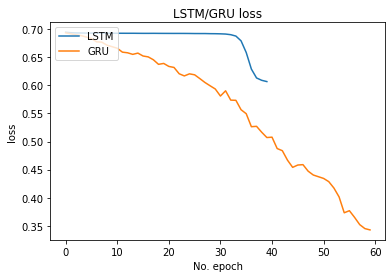

In [34]:
plt.plot(history_LSTM.history['loss'], label='LSTM')
plt.plot(history_GRU.history['loss'], label='GRU')
plt.title('LSTM/GRU loss')
plt.ylabel('loss')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

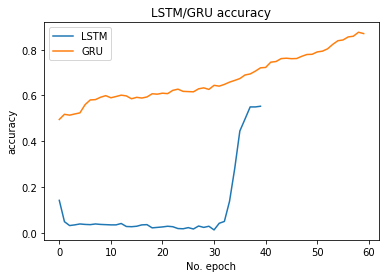

In [35]:
plt.plot(history_LSTM.history['accuracy'], label='LSTM')
plt.plot(history_GRU.history['accuracy'], label='GRU')
plt.title('LSTM/GRU accuracy')
plt.ylabel('accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

<span style="color:red">__TODO:__</span> Answer the question:

Which part of this task have you been struggling with the most? Describe how you resolved it.

<span style="color:red">__Answer:__</span>



The task that I was struggling most with was the level of accuracy of my model. Hence I took several actions to increase its capacity, trying not to create a very costly model. Hence, I first increased the numbers of epochs and then the number of layers

<span style="color:red">__TODO:__</span> Answer the question:

Which loss function did you use? Why?

<span style="color:red">__Answer:__</span>



I used the binary cross-entropy because it is about binary classification

## Part 3:  Build your own LSTMCell (25%)

In this part, you will code your own LSTM Cell implementation (including different types of gates that constitute the cell) to build LSTM layers.

It is recommended to see the course slides and [`LSTM` source code](https://github.com/keras-team/keras/blob/v2.10.0/keras/layers/rnn/lstm.py). [This link](https://colah.github.io/posts/2015-08-Understanding-LSTMs) also provides a good intuition. 

![](./img/lstm_cell.png)

**Note that this is a simplified figure and not all operations are illustrated.** Please refer to the lectures and follow the equations. 

Assuming some **old** carry state $c_{t-1}$ and hidden state $h_{t-1}$, we try to compute the **new states** given some input $X_t$ using the ideas of LSTM. 

Remember that for an LSTM cell, we actually have (yellow boxes from left to right) a **forget gate**, an **input gate**, a **cell** and an **output gate**, whose output can be denoted by $f_{t-1}$, $i_{t-1}$, $\tilde{c}_{t-1}$ and $o_{t-1}$. Each yellow box in the graph denotes a linear projection followed by a particular activation (`sigmoid` or `tanh`). 

Then for some input $X_t \in R^{N \times D}$ and a target output dimension $K$ (also called "units"), let's first combine the inputs with the old hidden state $h_{t-1} \in R^{N \times K}$ by projecting them into the same dimension 

$$
Z_t = X_t + h_{t-1} W_h
$$

where $W_h \in R^{K \times D}$. Then all new states can be computed one by one as 

$$
\begin{cases}
f_t = \sigma (Z_t W_f) \\
i_t = \sigma (Z_t W_i) \\
\tilde{c}_t = \tanh (Z_t W_c) \\
o_t = \sigma (Z_t W_o)
\end{cases}
$$

where the weights (also called kernels)

$$
W_f, W_i, W_c, W_o \in R^{D \times K}
$$

Then the **new** carry state is given by the **old carry state** passing through the forget gate and combining with the input

$$
c_t = f_t \odot c_{t-1} + i_t \odot \tilde{c}_t
$$

and the hidden state is given by the **new carry state** passing through the output gate

$$
h_t = o_t \odot \tanh (c_t)
$$

Note that when computing each state, we are actually computing the four linear projections on $Z_t$, which is **four** projections on $X_t$ and **eight** (because of the $W_h$) projections on $h_{t-1}$. This doesn't look smart enough, so let's rewrite the equations. 

First define a kernel $W \in R^{D \times 4 K}$, which can be thought of as

$$
W \gets [W_f, W_i, W_c, W_o]
$$

Similarly define a recurrent kernel $W_r \in R^{K \times 4 K}$, which is equivalent to 

$$
W_r \gets W_h W = [W_h W_f, W_h W_i, W_h W_c, W_h W_o]
$$


We can, of course, also add a bias $b \in R^{4 K}$, and now all the projections simplifies to 

$$
Z_t = X_t W + h_{t-1} W_r + \mathbb{1} b^T \in R^{N \times 4 K}
$$

We do exactly **one** projection on $X_t$ and **one** on $h_{t-1}$. Then we partition $Z_t$ into 

$$
[z_t^f, z_t^i, z_t^c, z_t^o] \gets Z_t, \quad
z_t^* \in R^{N \times K}
$$

Easily, 

$$
\begin{cases}
f_t = \sigma (z_t^f) \\
i_t = \sigma (z_t^i) \\
\tilde{c}_t = \tanh (z_t^c) \\
o_t = \sigma (z_t^o)
\end{cases}
$$

and the rest stays the same. 

<span style="color:red">__TODO:__</span> 

1. Complete the model `LSTMCell` in **utils/LSTM.py**
2. Verify the function with Tensorflow by running the provided code

<span style="color:red">__NOTE:__</span> 

You should use the "simplified" (second) set of equations as TensorFlow does. 

In [18]:
# Veirification Code
# Please don't change anything

from utils.LSTM import LSTMCell

batch_size = 4
input_dim = 8
units = 64

inputs = tf.random.normal((batch_size, input_dim))
states = [tf.random.normal((batch_size, units)), tf.zeros((batch_size, units))]

# By default, the weights will be initialized randomly (as specified in the code). 
# Here we try to enforce deterministic (non-random) initializers 
# so that the two results can be correctly compared. 
# NOTE: You should NOT do this and leave them to default during actual training

lstm_cell = LSTMCell(
    units, 
    kernel_initializer=tf.keras.initializers.Ones, 
    recurrent_initializer=tf.keras.initializers.Ones, 
    bias_initializer=tf.keras.initializers.Zeros
)
h, (_, c) = lstm_cell(inputs, states)

lstm_cell_tf = tf.keras.layers.LSTMCell(
    units, 
    kernel_initializer='ones', 
    recurrent_initializer='ones', 
    bias_initializer='zeros'
)
h_tf, (_, c_tf) = lstm_cell_tf(inputs, states)

print('Simple verification:')
print('Is h correct?', np.allclose(h.numpy(), h_tf.numpy()))
print('Is c correct?', np.allclose(c.numpy(), c_tf.numpy()))

Simple verification:
Is h correct? True
Is c correct? True


In [32]:
in_data, out_data = create_xor_dataset(1024)# Create a dataset with a batch size of 1000

#### Hint on building a model with your LSTMCell

When creating an RNN with your custom cell, you can just plug in your `LSTMCell` as a building block into a basic `RNN` layer, specify other parameters (e.g. input_shape) as needed, and add it into your model as you did with other layers before. 

```
self.rnn = tf.keras.layers.RNN([YOUR_CELL], **OTHER_ARGS)
```

For details, please refer to https://www.tensorflow.org/guide/keras/rnn. 

<span style="color:red">__TODO:__</span> Complete the model `LSTMModel` in **utils/LSTM.py**

<span style="color:red">__NOTE:__</span> 

We are trying to use a custom layer (our `LSTMCell`) with multiple `call` arguments ("inputs" and "states"). The pre-building of these types of models is currently NOT allowed in tensorflow. 

So be sure NOT to call `model.summary()`. Compile and fit it directly and the building will be automatically done in runtime. 

<span style="color:red">__TODO:__</span> Train your `LSTMModel`

In [30]:
from utils.LSTM import LSTMModel

###################################################
# TODO: Instantiate your own model and train it.  #
###################################################

seq_len = 8
feature_dim = 1
output_dim = 8
units = 16
activation = 'sigmoid'

custom_model = LSTMModel(units=units, output_dim=output_dim, activation=activation, input_shape=(seq_len, feature_dim))

# Compile the custom model
custom_model.compile(
    loss='binary_crossentropy',  
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Adam optimizer
    metrics=['accuracy']  
)

# Train the custom model
history = custom_model.fit(
    in_data, 
    out_data, 
    batch_size=64, 
    epochs=75,  
    verbose=2
)


###################################################
# END TODO                                        #
###################################################

Epoch 1/75
16/16 - 1s - loss: 0.6934 - accuracy: 0.3867
Epoch 2/75
16/16 - 0s - loss: 0.6931 - accuracy: 0.2949
Epoch 3/75
16/16 - 0s - loss: 0.6931 - accuracy: 0.2646
Epoch 4/75
16/16 - 0s - loss: 0.6930 - accuracy: 0.2686
Epoch 5/75
16/16 - 0s - loss: 0.6929 - accuracy: 0.2021
Epoch 6/75
16/16 - 0s - loss: 0.6929 - accuracy: 0.1104
Epoch 7/75
16/16 - 0s - loss: 0.6929 - accuracy: 0.0596
Epoch 8/75
16/16 - 0s - loss: 0.6928 - accuracy: 0.0840
Epoch 9/75
16/16 - 0s - loss: 0.6928 - accuracy: 0.0723
Epoch 10/75
16/16 - 0s - loss: 0.6928 - accuracy: 0.0537
Epoch 11/75
16/16 - 0s - loss: 0.6927 - accuracy: 0.1025
Epoch 12/75
16/16 - 0s - loss: 0.6925 - accuracy: 0.1562
Epoch 13/75
16/16 - 0s - loss: 0.6924 - accuracy: 0.2412
Epoch 14/75
16/16 - 0s - loss: 0.6921 - accuracy: 0.3076
Epoch 15/75
16/16 - 0s - loss: 0.6917 - accuracy: 0.3779
Epoch 16/75
16/16 - 0s - loss: 0.6903 - accuracy: 0.4609
Epoch 17/75
16/16 - 0s - loss: 0.6864 - accuracy: 0.4482
Epoch 18/75
16/16 - 0s - loss: 0.6761 - 

### Visualize loss and accuracy

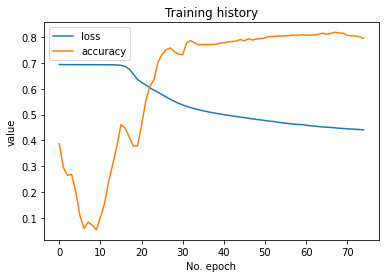

In [31]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.title('Training history')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()